Plate: 20191202_KPi_Triton.CSV 	 Compound: Lauric Acid


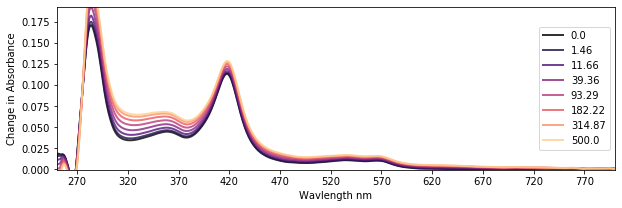

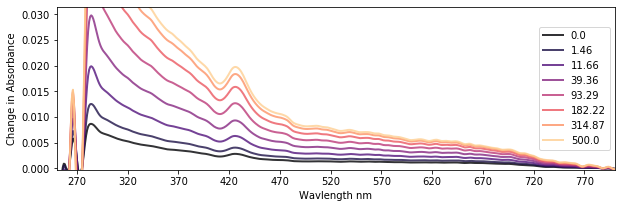

/home/james/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/james/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


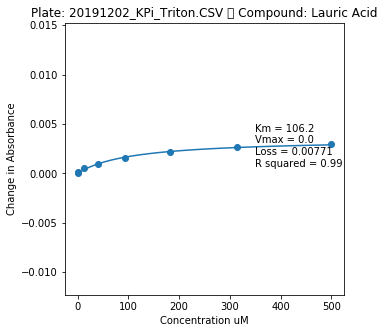

Plate: 20191202_KPi_Triton.CSV 	 Compound: Lauric Acid


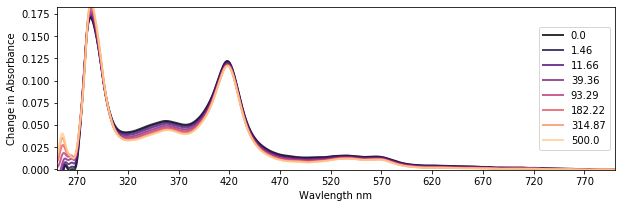

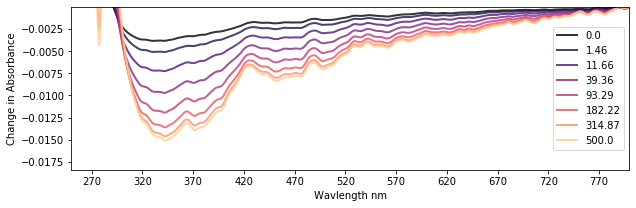

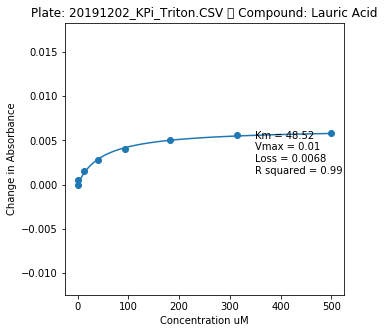

Plate: 20191202_KPi_Triton.CSV 	 Compound: Lauric Acid


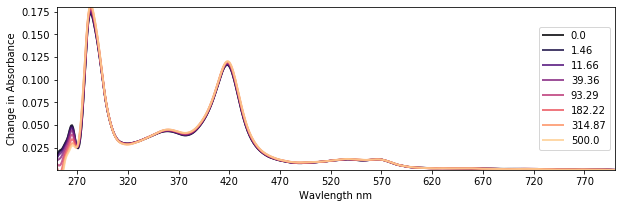

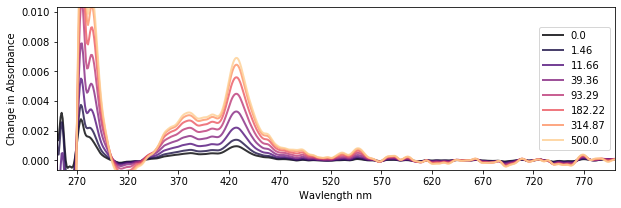

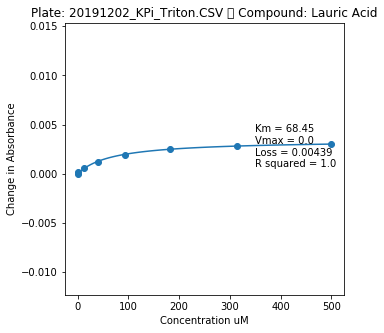

Plate: 20191202_KPi_Triton.CSV 	 Compound: Lauric Acid


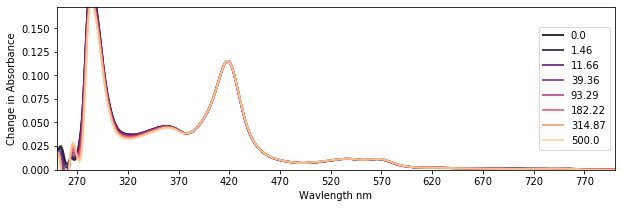

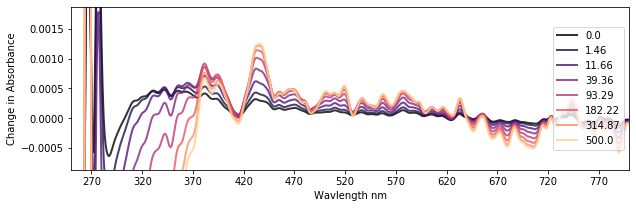

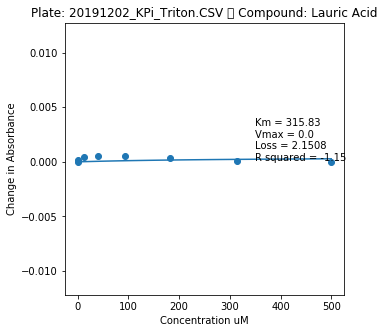

Plate: 20191202_KPi_Triton.CSV 	 Compound: Lauric Acid


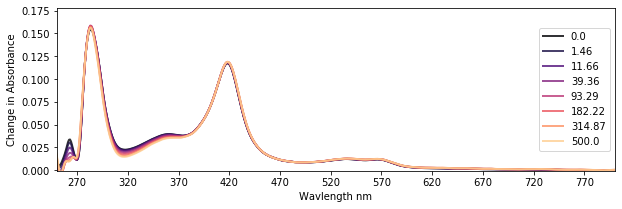

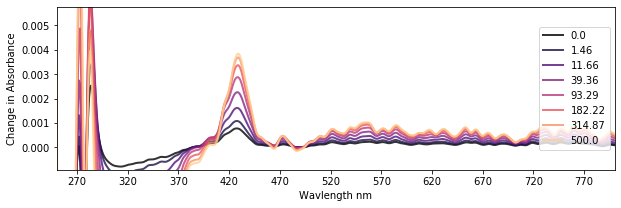

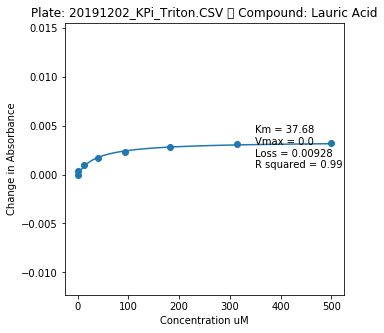

Plate: 20191202_KPi_Triton.CSV 	 Compound: Lauric Acid


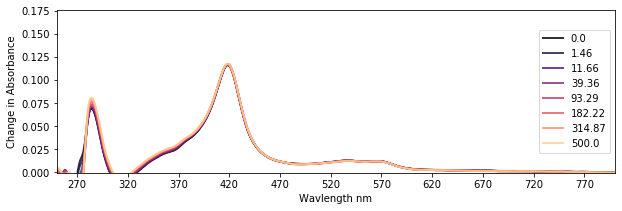

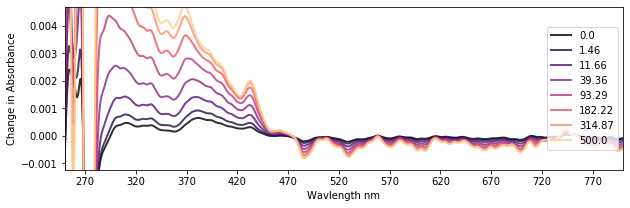

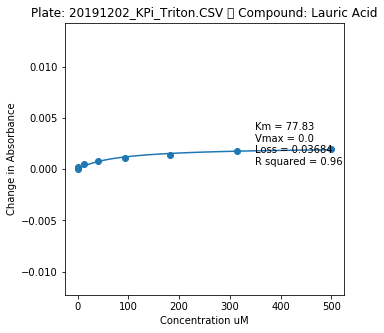

Plate: 20191202_KPi_Triton.CSV 	 Compound: Arachadionic Acid


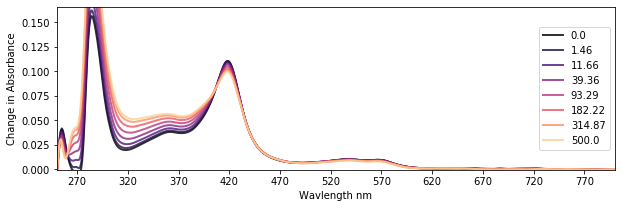

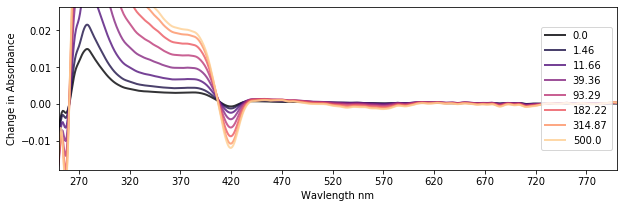

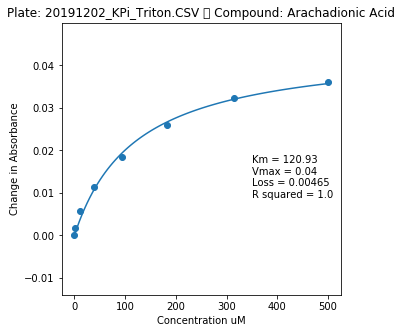

Plate: 20191202_KPi_Triton.CSV 	 Compound: Arachadionic Acid


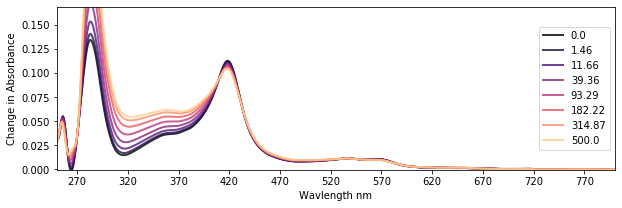

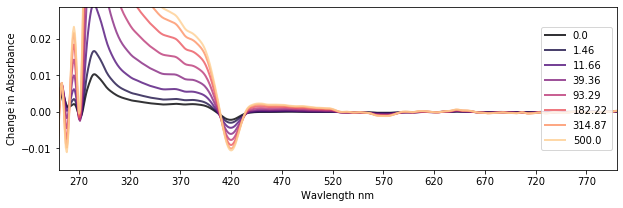

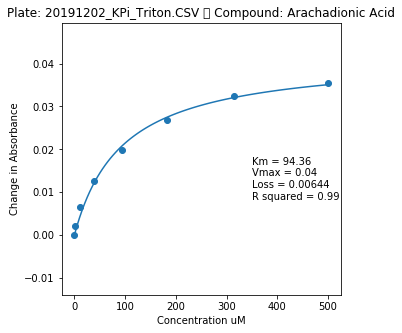

Plate: 20191202_KPi_Triton.CSV 	 Compound: Arachadionic Acid


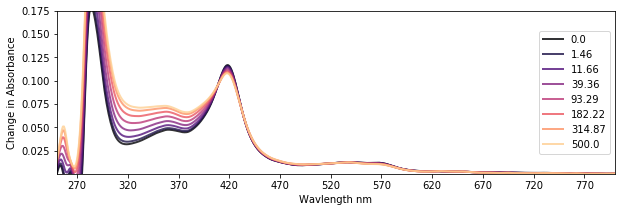

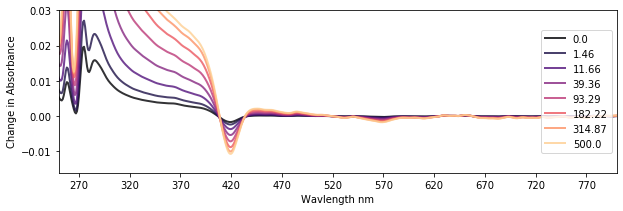

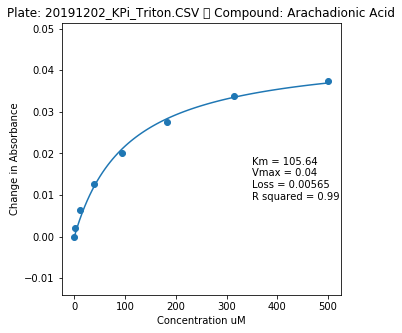

Plate: 20191202_KPi_Triton.CSV 	 Compound: Arachadionic Acid


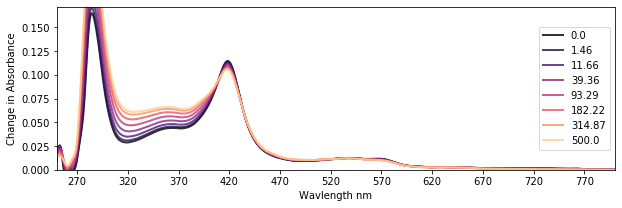

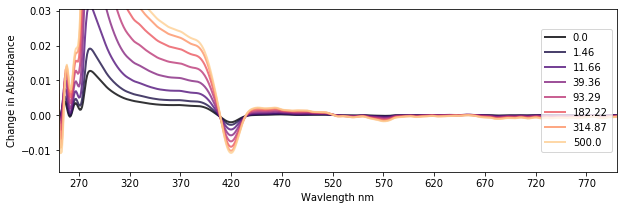

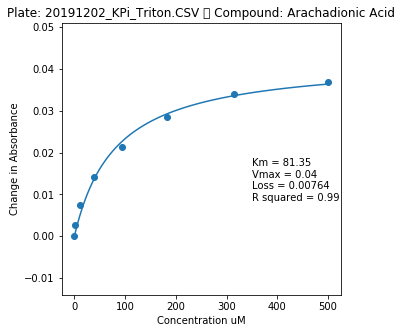

Plate: 20191202_KPi_Triton.CSV 	 Compound: Arachadionic Acid


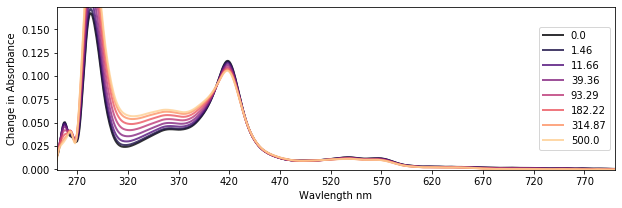

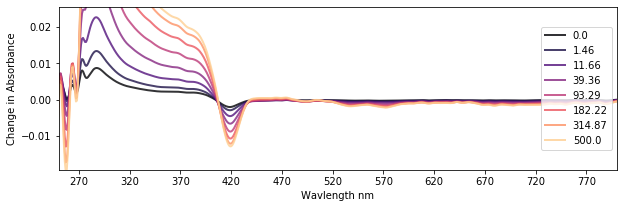

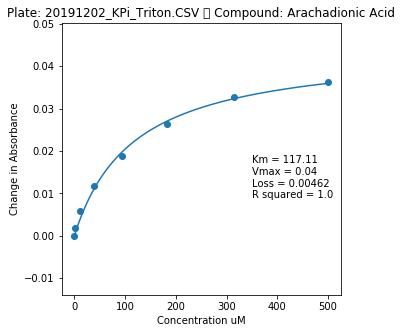

Plate: 20191202_KPi_Triton.CSV 	 Compound: Arachadionic Acid


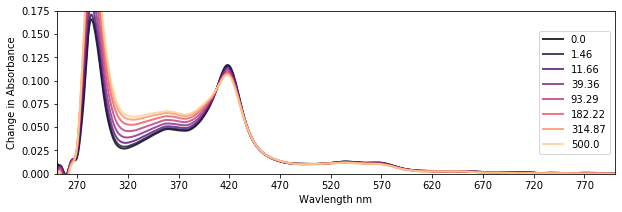

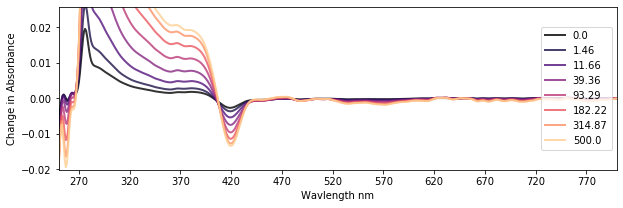

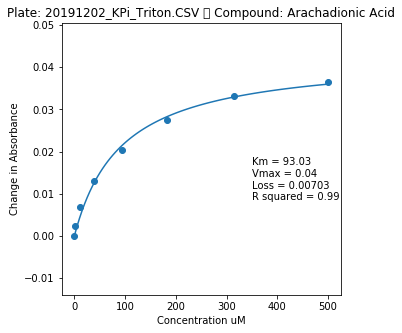

Plate: 20191202_KPi_Triton.CSV 	 Compound: Palmitic Acid


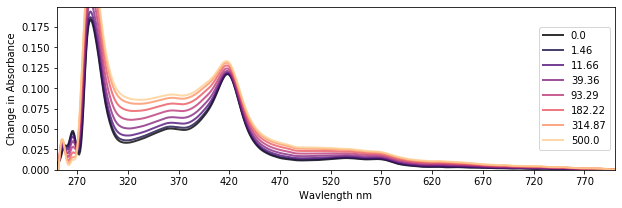

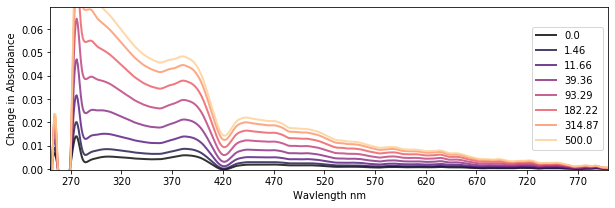

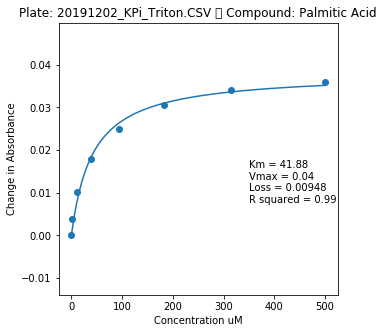

Plate: 20191202_KPi_Triton.CSV 	 Compound: Palmitic Acid


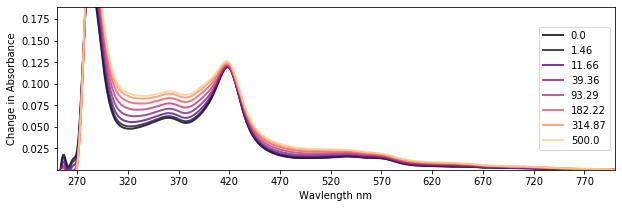

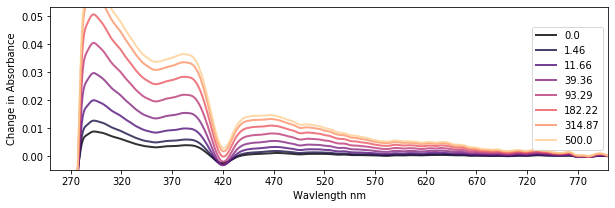

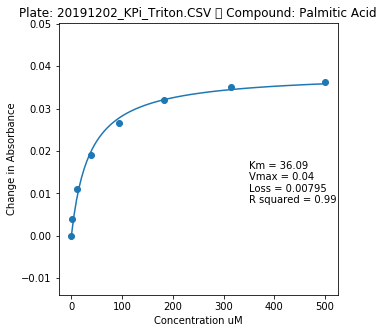

Plate: 20191202_KPi_Triton.CSV 	 Compound: Palmitic Acid


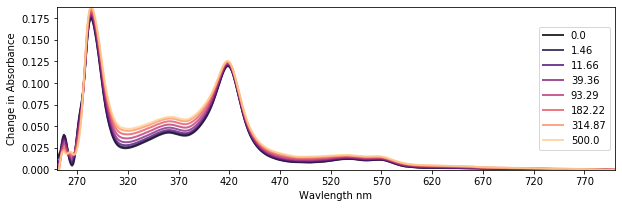

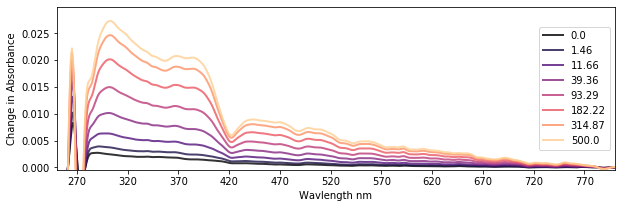

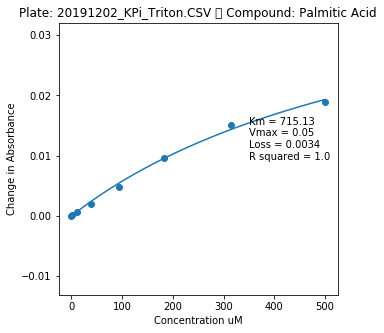

Plate: 20191202_KPi_Triton.CSV 	 Compound: Palmitic Acid


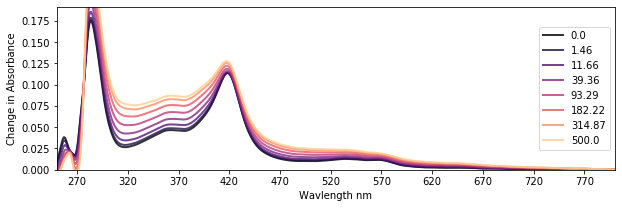

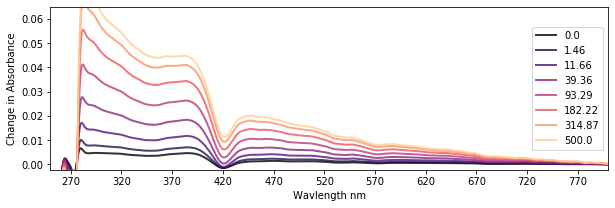

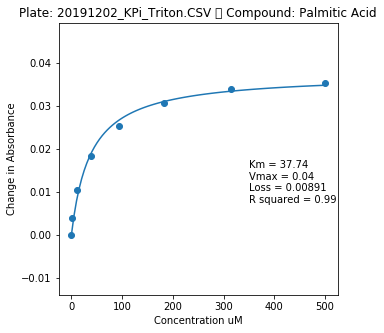

Plate: 20191202_KPi_Triton.CSV 	 Compound: Palmitic Acid


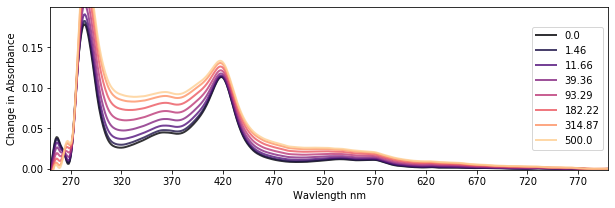

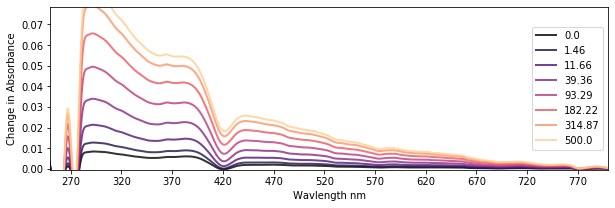

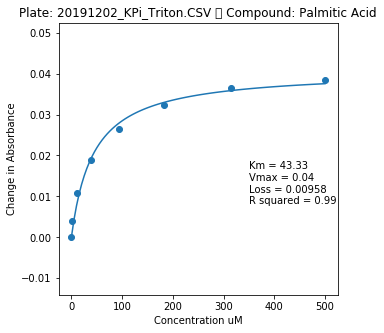

Plate: 20191202_KPi_Triton.CSV 	 Compound: Palmitic Acid


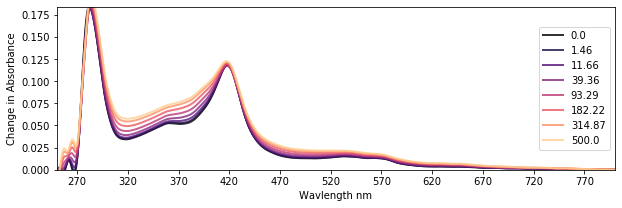

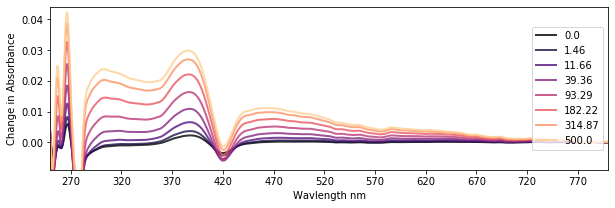

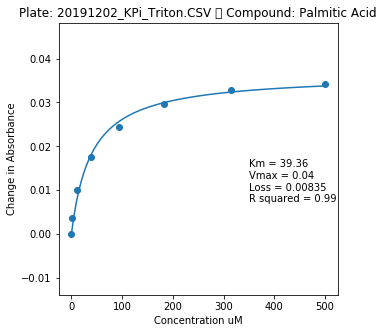

Plate: 20191202_KPi_Triton.CSV 	 Compound: 4-Phenylimidazole


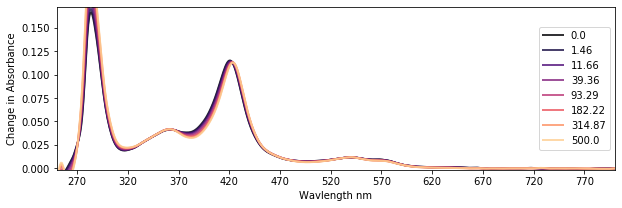

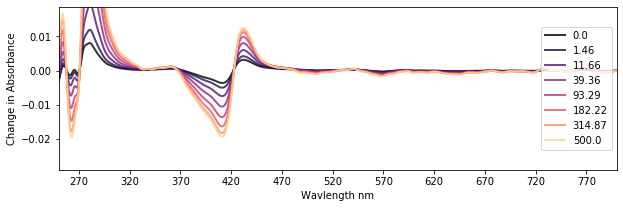

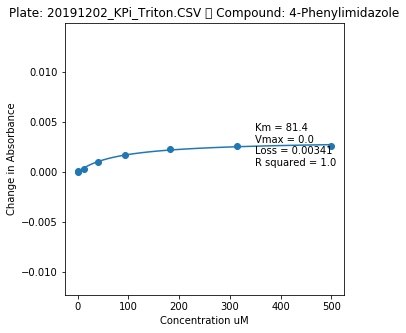

Plate: 20191202_KPi_Triton.CSV 	 Compound: 4-Phenylimidazole


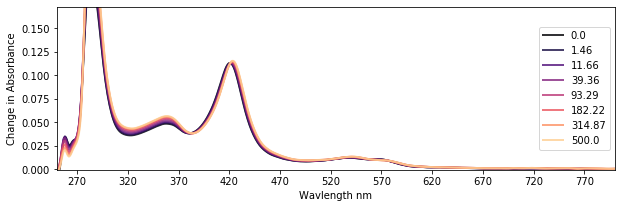

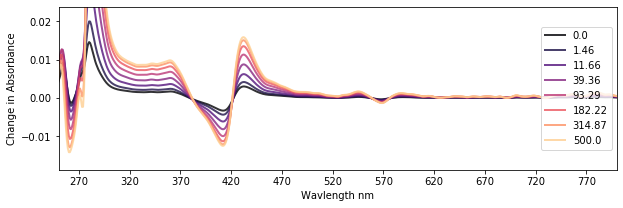

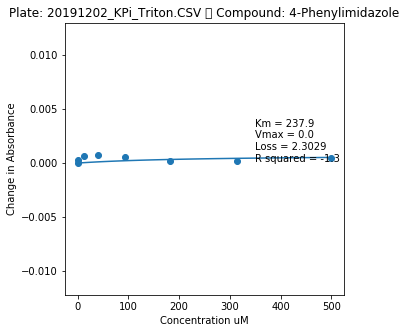

Plate: 20191202_KPi_Triton.CSV 	 Compound: 4-Phenylimidazole


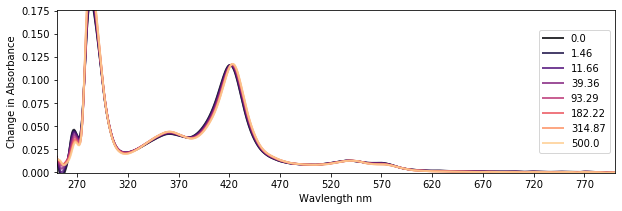

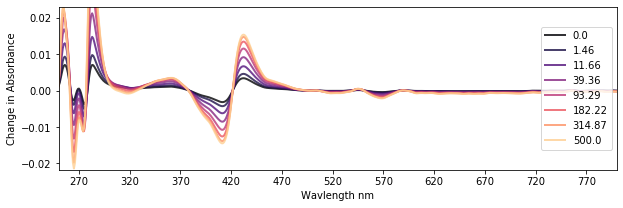

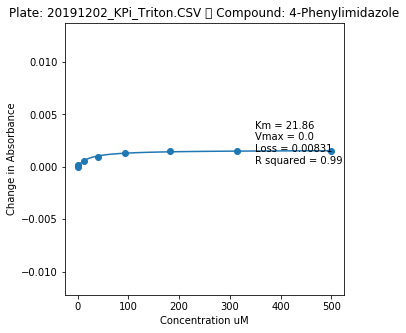

Plate: 20191202_KPi_Triton.CSV 	 Compound: 4-Phenylimidazole


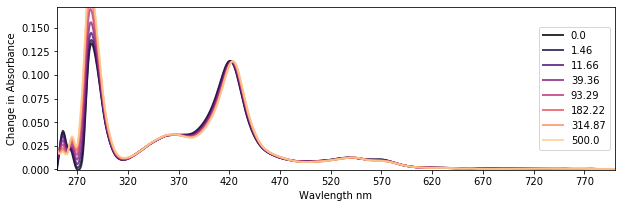

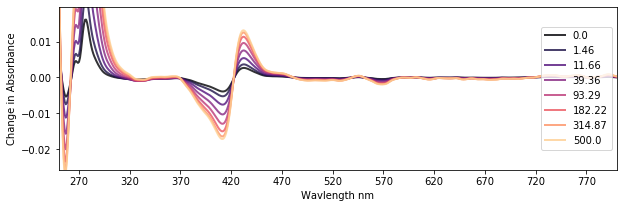

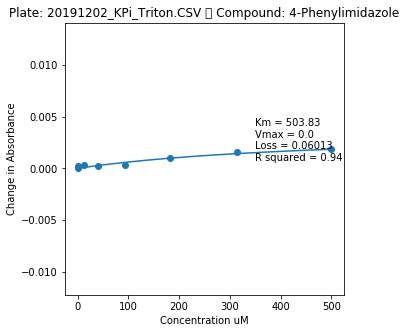

Plate: 20191202_KPi_Triton.CSV 	 Compound: 4-Phenylimidazole


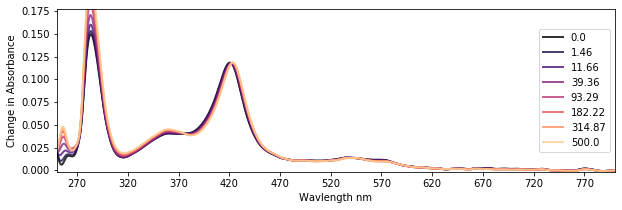

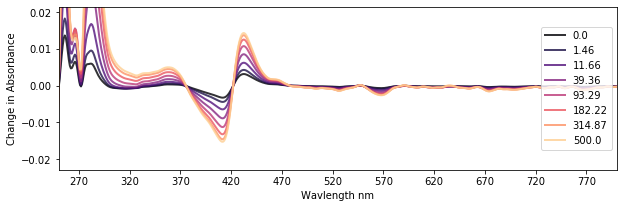

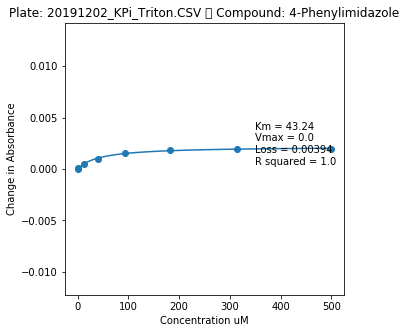

Plate: 20191202_KPi_Triton.CSV 	 Compound: 4-Phenylimidazole


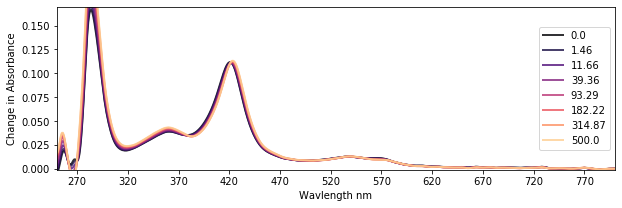

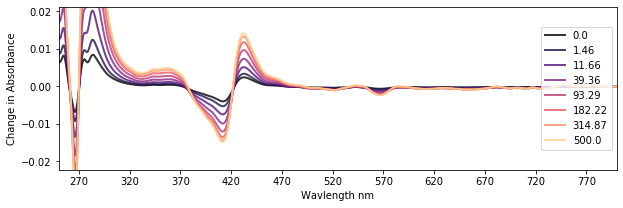

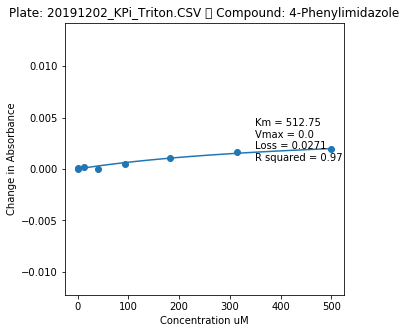

Plate: 20191202_KPi.CSV 	 Compound: Lauric Acid


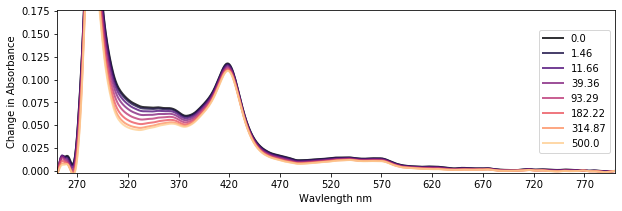

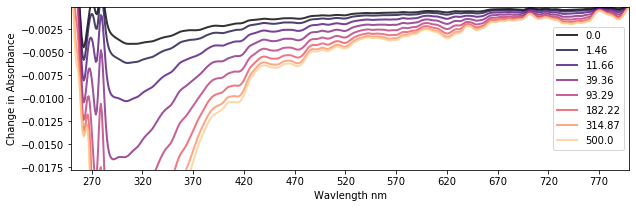

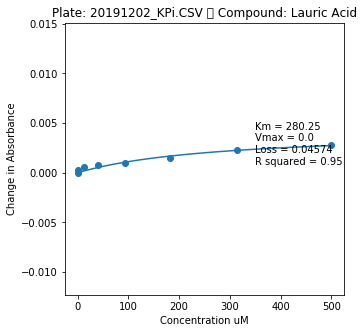

Plate: 20191202_KPi.CSV 	 Compound: Lauric Acid


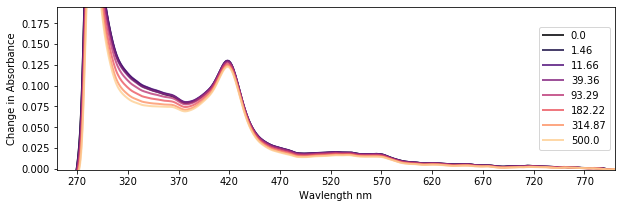

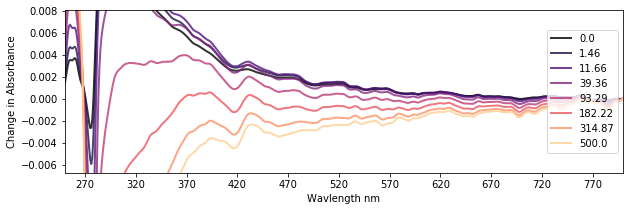

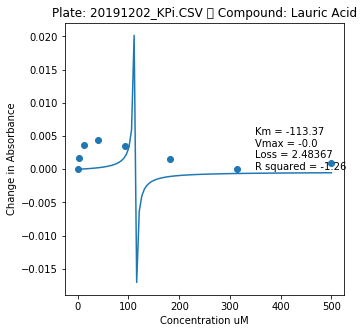

Plate: 20191202_KPi.CSV 	 Compound: Lauric Acid


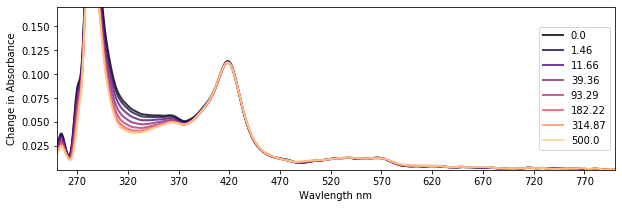

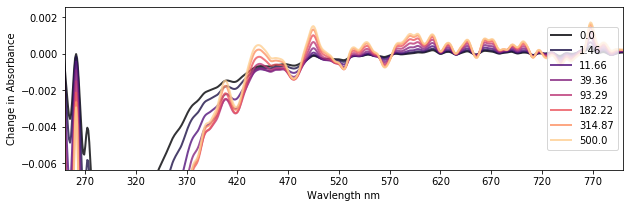

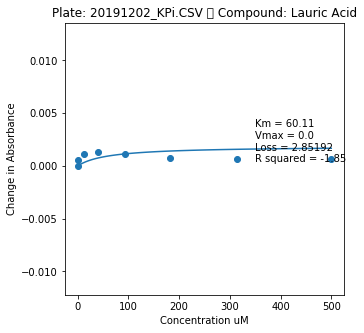

Plate: 20191202_KPi.CSV 	 Compound: Lauric Acid


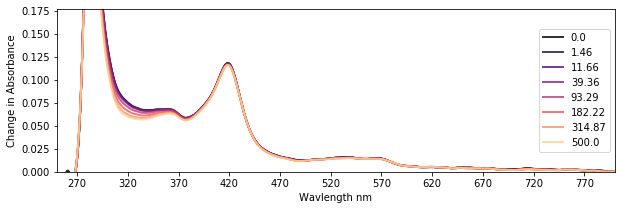

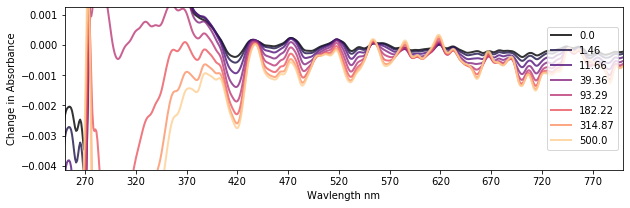

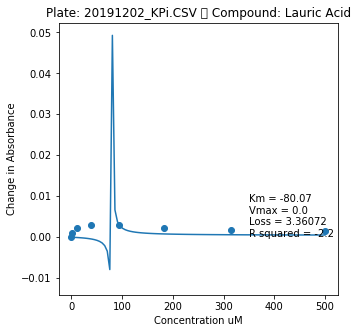

Plate: 20191202_KPi.CSV 	 Compound: Lauric Acid


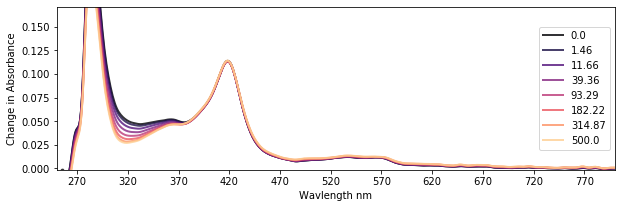

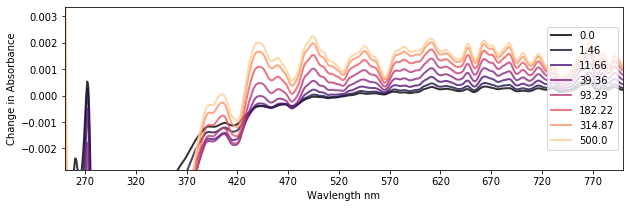

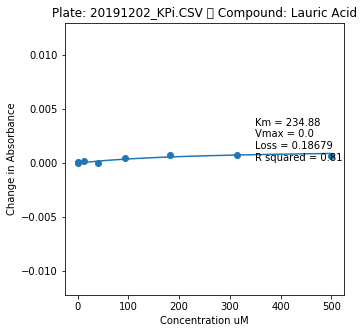

Plate: 20191202_KPi.CSV 	 Compound: Lauric Acid


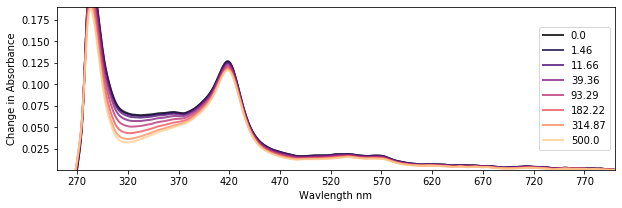

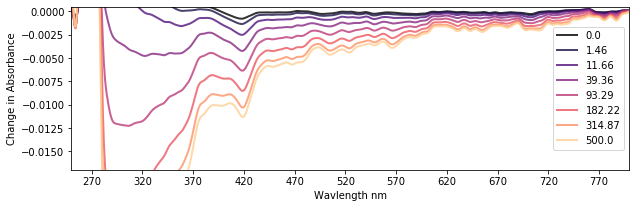

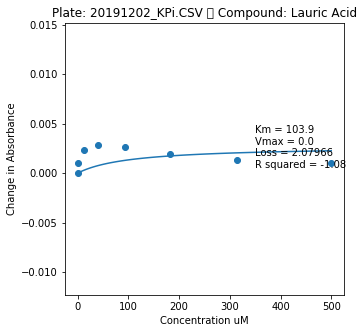

Plate: 20191202_KPi.CSV 	 Compound: Arachadionic Acid


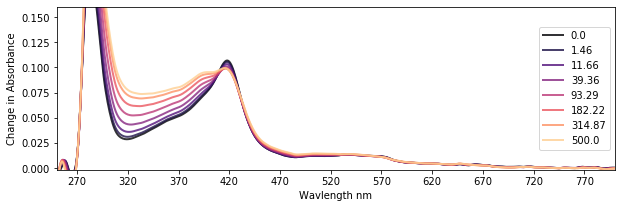

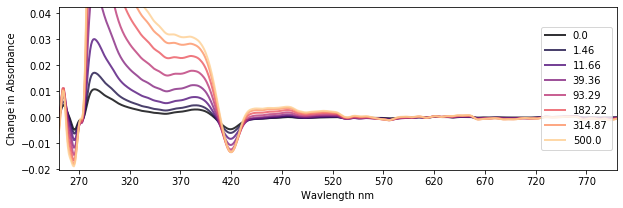

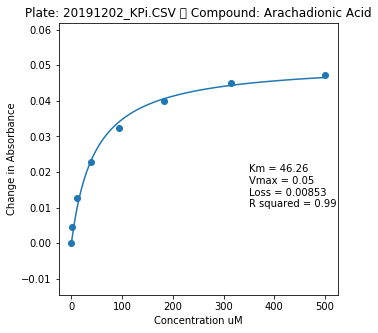

Plate: 20191202_KPi.CSV 	 Compound: Arachadionic Acid


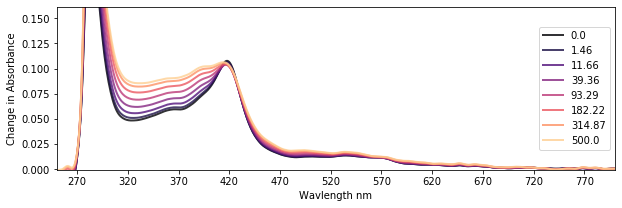

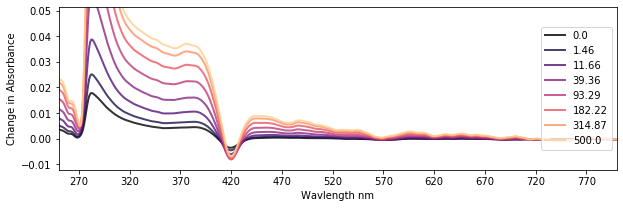

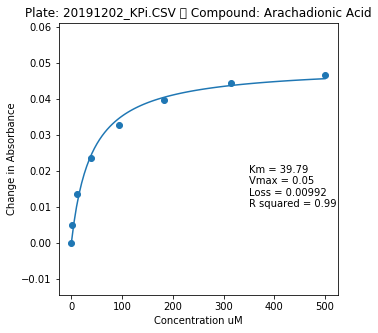

Plate: 20191202_KPi.CSV 	 Compound: Arachadionic Acid


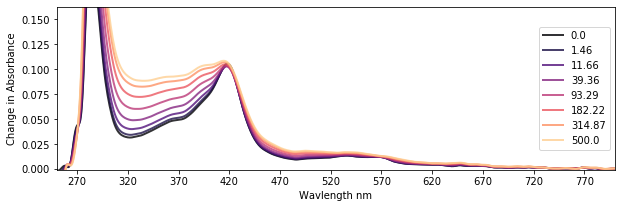

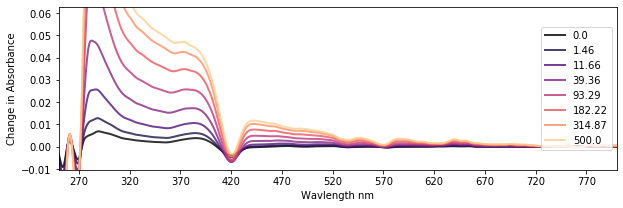

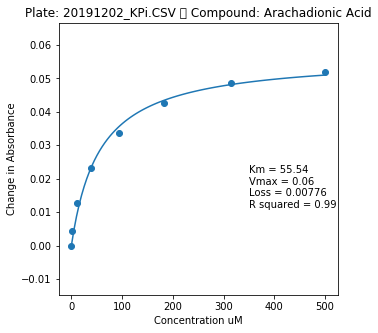

Plate: 20191202_KPi.CSV 	 Compound: Arachadionic Acid


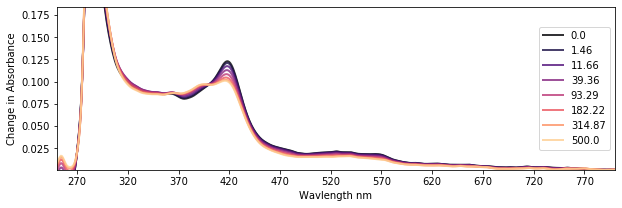

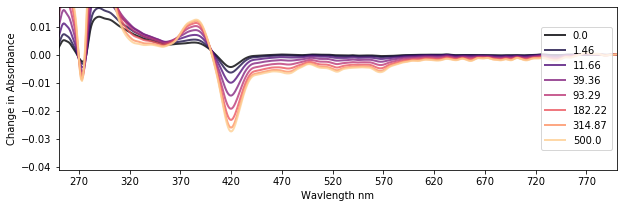

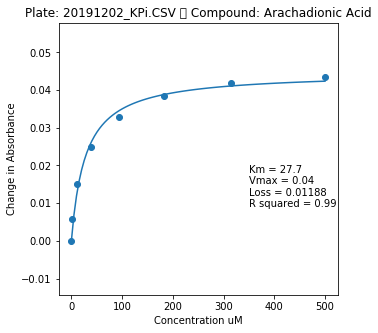

Plate: 20191202_KPi.CSV 	 Compound: Arachadionic Acid


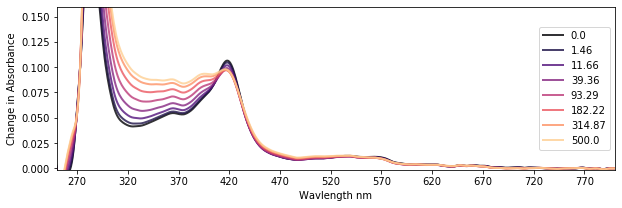

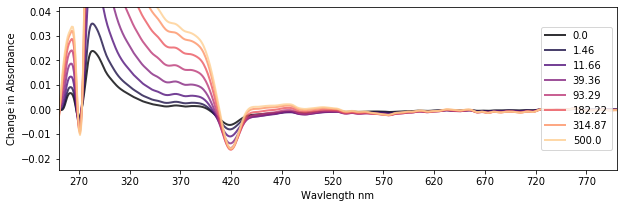

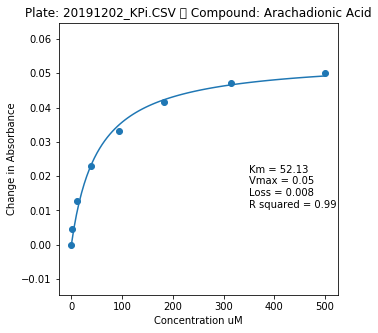

Plate: 20191202_KPi.CSV 	 Compound: Arachadionic Acid


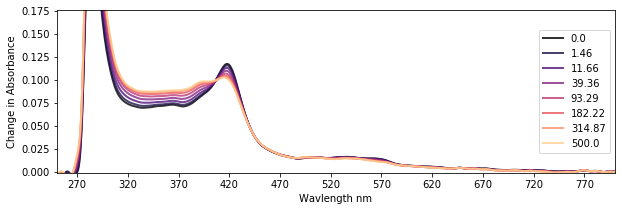

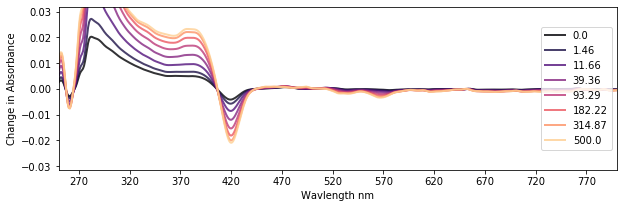

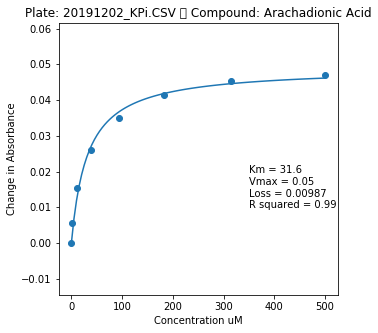

Plate: 20191202_KPi.CSV 	 Compound: Palmitic Acid


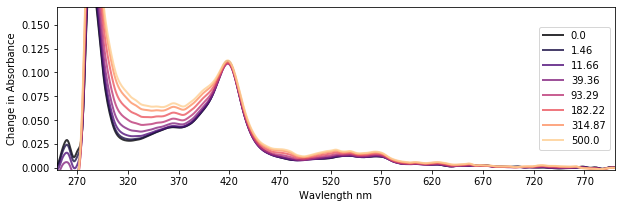

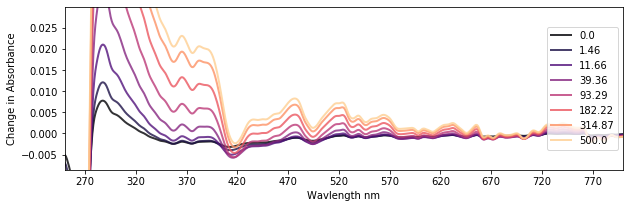

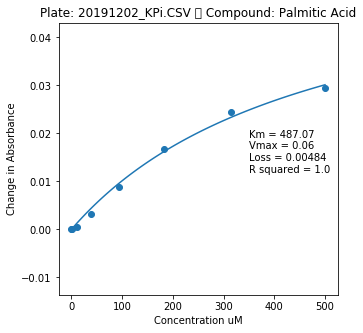

Plate: 20191202_KPi.CSV 	 Compound: Palmitic Acid


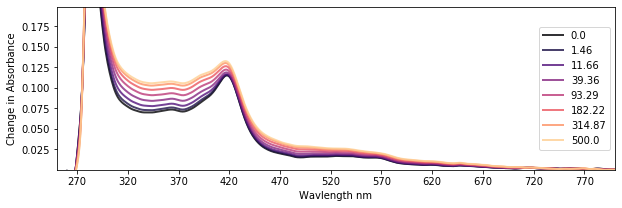

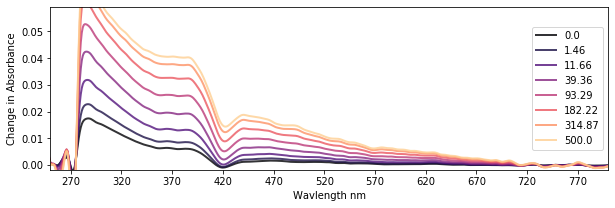

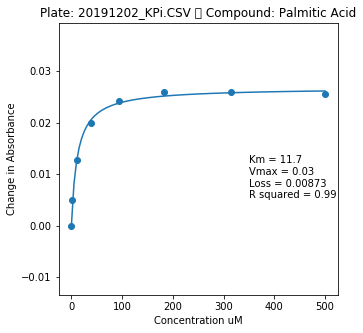

Plate: 20191202_KPi.CSV 	 Compound: Palmitic Acid


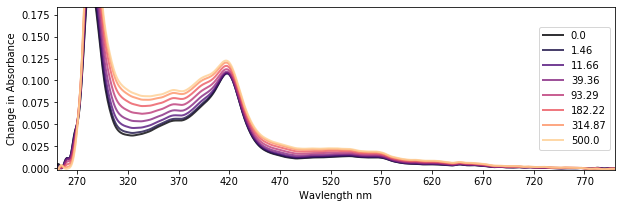

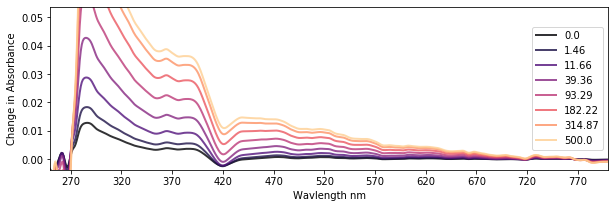

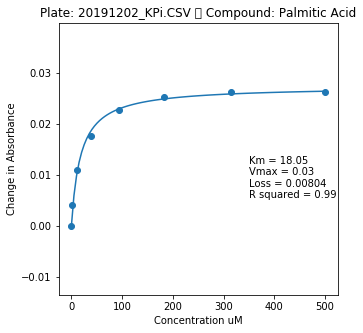

Plate: 20191202_KPi.CSV 	 Compound: Palmitic Acid


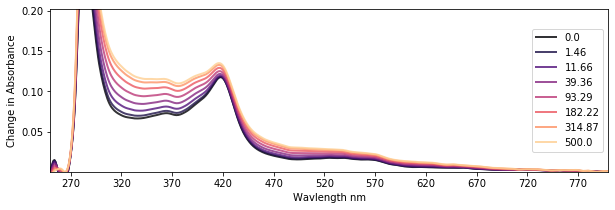

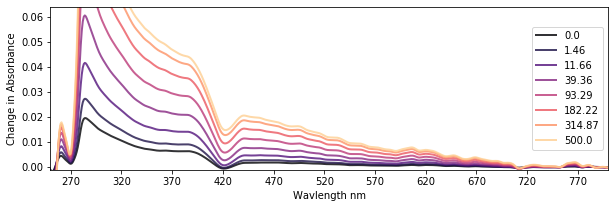

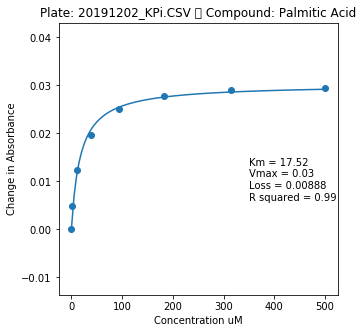

Plate: 20191202_KPi.CSV 	 Compound: Palmitic Acid


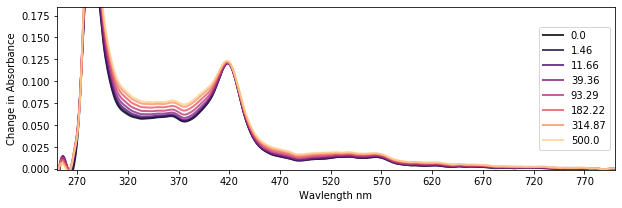

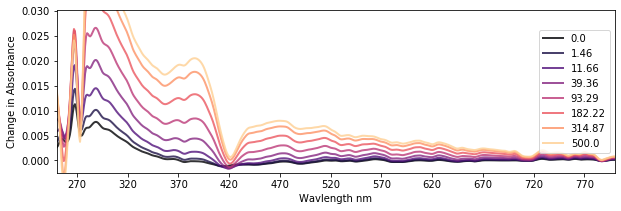

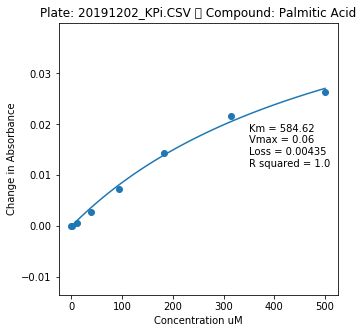

Plate: 20191202_KPi.CSV 	 Compound: Palmitic Acid


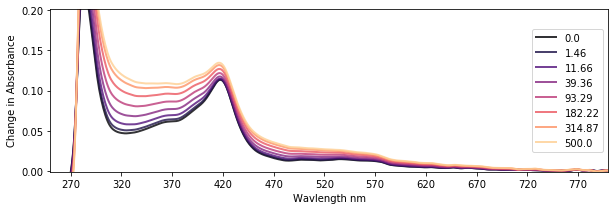

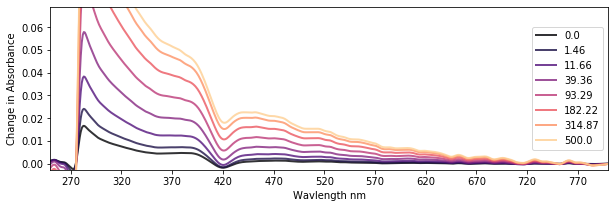

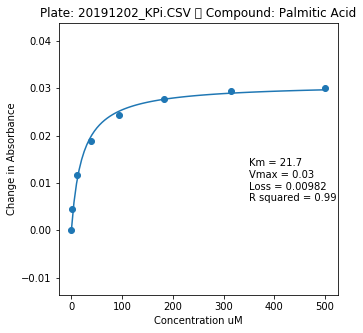

Plate: 20191202_KPi.CSV 	 Compound: 4-Phenylimidazole


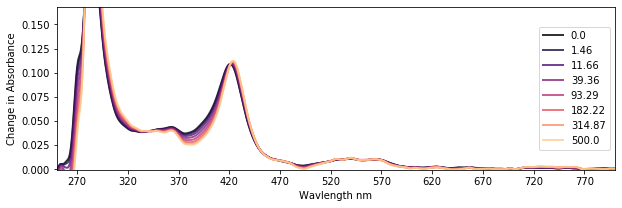

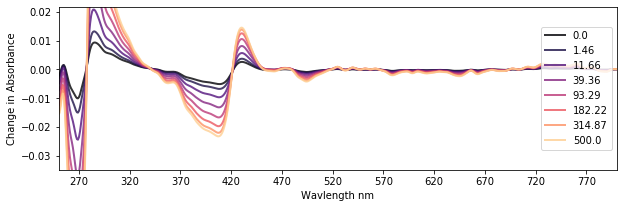

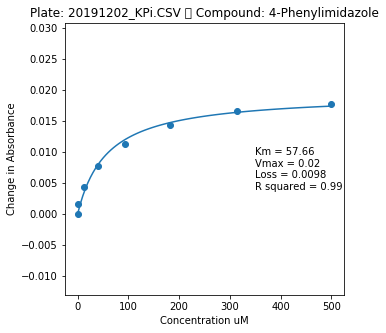

Plate: 20191202_KPi.CSV 	 Compound: 4-Phenylimidazole


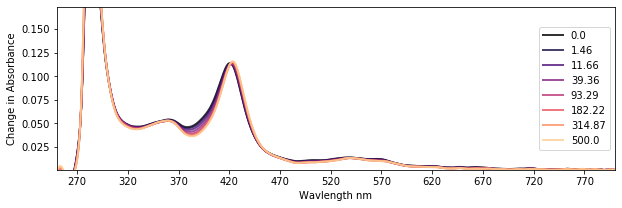

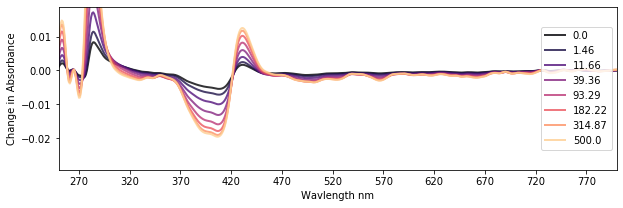

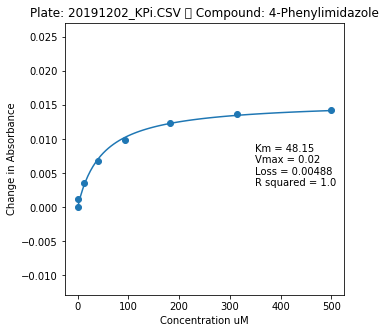

Plate: 20191202_KPi.CSV 	 Compound: 4-Phenylimidazole


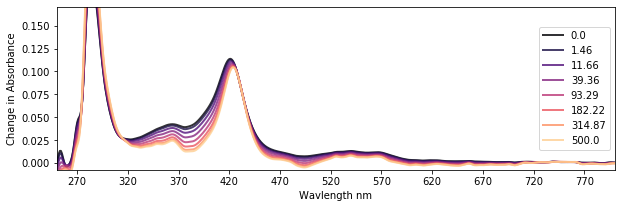

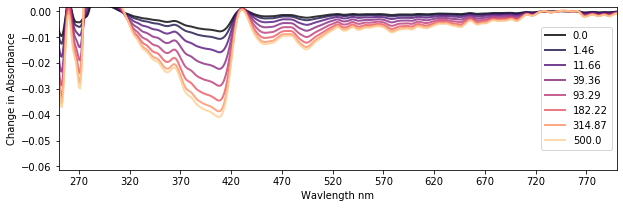

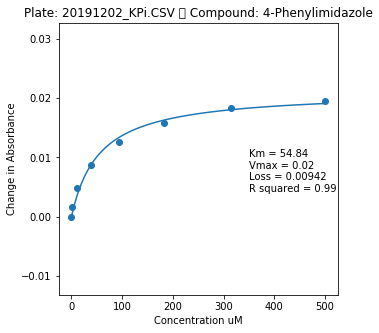

Plate: 20191202_KPi.CSV 	 Compound: 4-Phenylimidazole


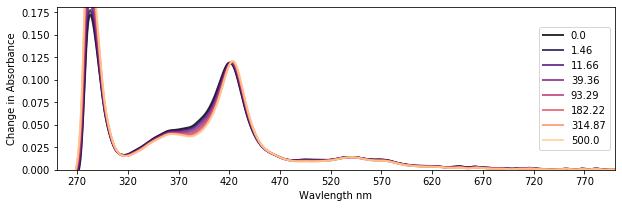

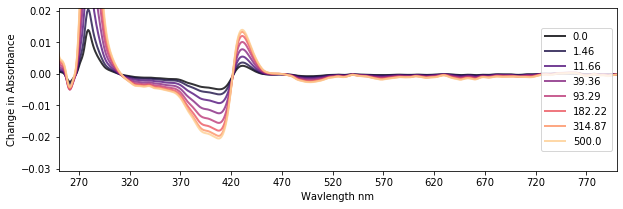

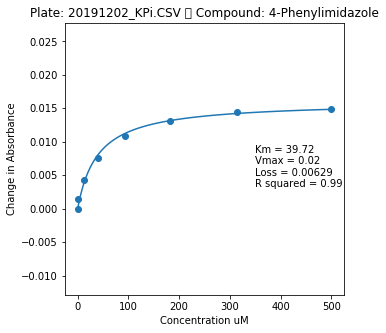

Plate: 20191202_KPi.CSV 	 Compound: 4-Phenylimidazole


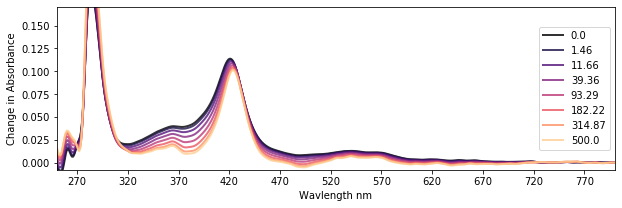

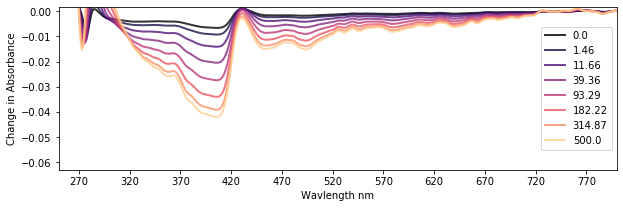

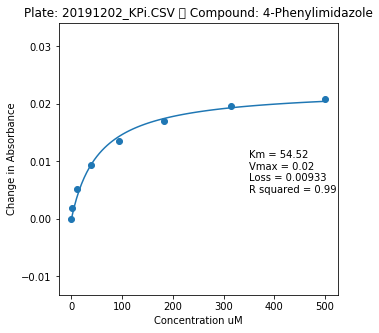

Plate: 20191202_KPi.CSV 	 Compound: 4-Phenylimidazole


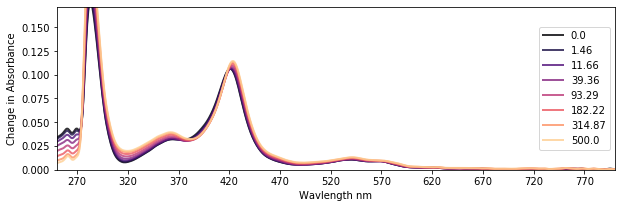

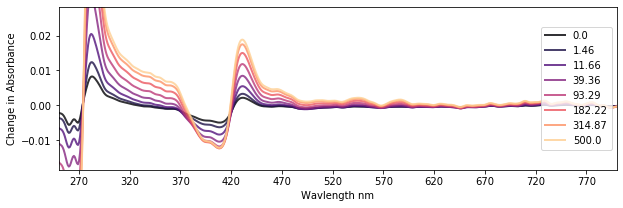

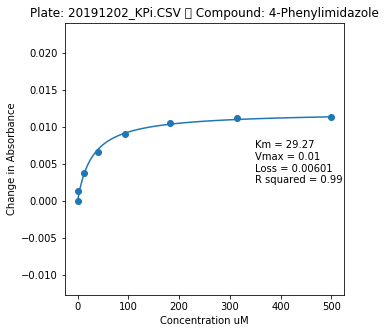

In [2]:
import pandas as pd
import numpy as np
from PlateAnalysis import PlateDataset
import matplotlib.pyplot as plt
import re


TritonPlate = PlateDataset('20191202_KPi_Triton.CSV')
KPiPlate = PlateDataset('20191202_KPi.CSV')


CompoundMap = dict(zip(range(1,25),['Lauric Acid']*6 + \
                       ['Arachadionic Acid']*6 + \
                       ['Palmitic Acid']*6 + \
                       ['4-Phenylimidazole']*6))

metrics = pd.DataFrame([],columns = ['Plate','Block','Kd','Vmax','R_sq','Noise'])

for i in [TritonPlate,KPiPlate]:
    for j in range(1,25):
        
        NormalizedTraces, DifferenceSpec, DiffDiff = i.AnalysisPipeline_1(j)
        print('Plate: {} \t Compound: {}'.format(i.plate_data,CompoundMap[j]))
        i.PlotTrace(NormalizedTraces)
        i.PlotTrace(DifferenceSpec)
        K,percentDMSO, Vol = 3, 5, 20
        concs = i.CalculateCompoundConcs(K,Vol,percentDMSO)
        km, vmax, loss = i.FitMichaelisMenten(concs, DiffDiff)
        i.PlotMichaelesMenten(DiffDiff,concs,\
                              km, vmax, loss,\
                              'Plate: {} \t Compound: {}'.format(i.plate_data,CompoundMap[j]))
        noise = i.Noise(NormalizedTraces)
        
        temp = pd.DataFrame([[str(i.plate_data),j,CompoundMap[j],km,vmax,1-loss, noise]],\
                                      columns = ['Plate','Block','Compound','Kd','Vmax','R_sq','Noise'])
        metrics = metrics.append(temp,sort = True)

metrics.reset_index(inplace = True,drop=True)
metrics.to_csv('Triton0.1Percent_metrics.csv')

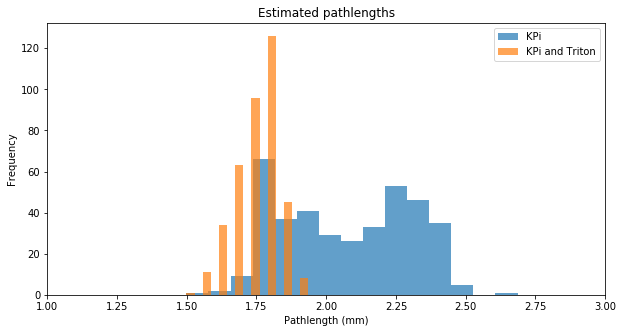

In [9]:
from PathLength import PlatePathlength

files = ['20191202_pathlength_kpi.CSV',\
         '20191202_pathlength_kpi_Triton.CSV']

K_kpiDMSO =  0.16010577232
K_kpiDMSOTriton =  0.15866462890000002

K_values = [K_kpiDMSO,K_kpiDMSO]


plt.figure(figsize = (10,5))

for i,j in zip(files,K_values):
    data = PlatePathlength(i,j)
    plengths = data.Pathlength()
    plt.hist(plengths, bins = 15, alpha = 0.7)
    
plt.title('Estimated pathlengths')
plt.legend(['KPi ','KPi and Triton'])
plt.xlabel('Pathlength (mm)')
plt.ylabel('Frequency')
plt.xlim((1,3))
plt.show()

20191202_pathlength_kpi.CSV


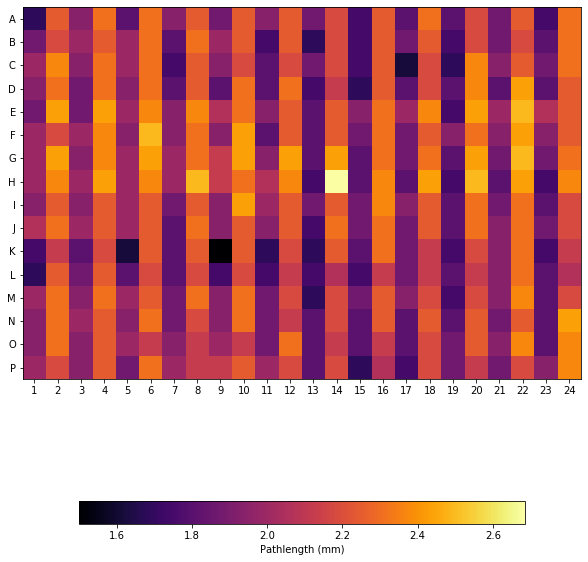

20191202_pathlength_kpi_Triton.CSV


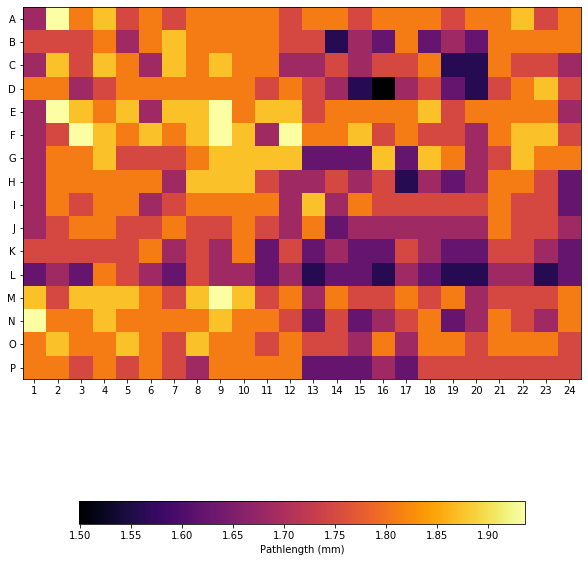

In [10]:
for i,j in zip(files,K_values):
    data = PlatePathlength(i,j)
    print(i)
    data.PlotPlatePathlenghs()

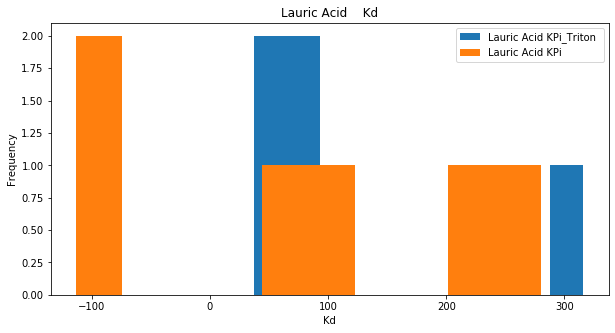

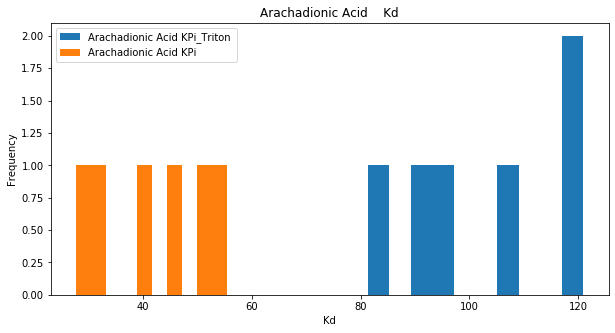

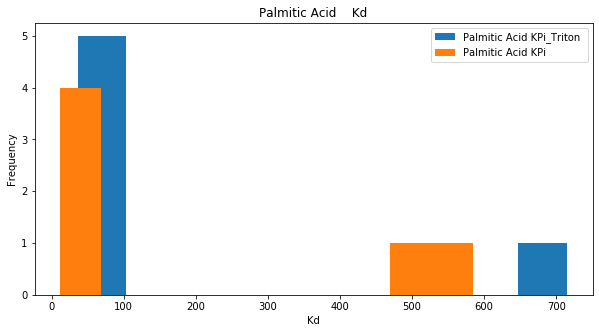

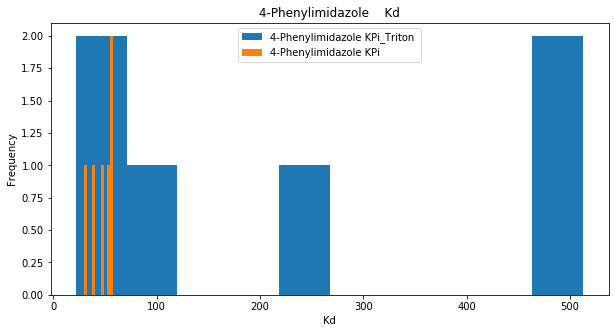

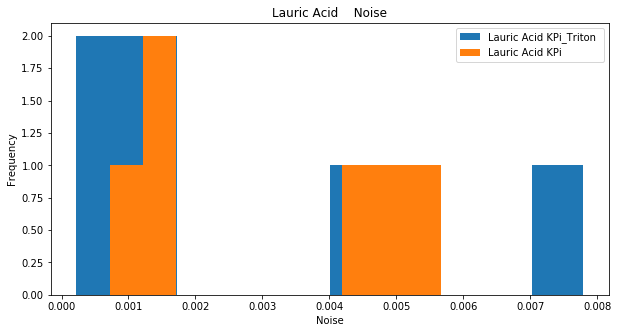

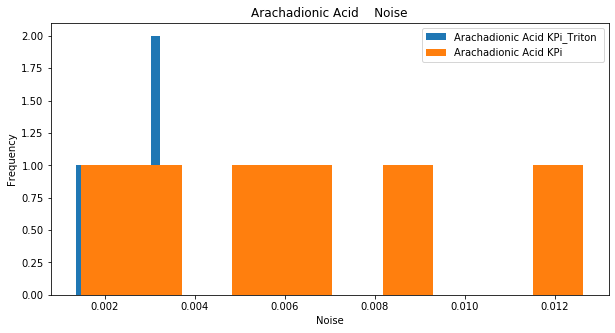

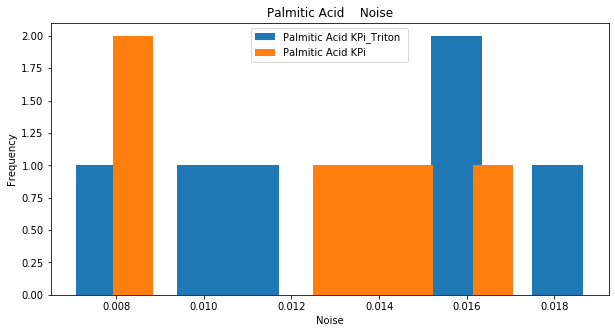

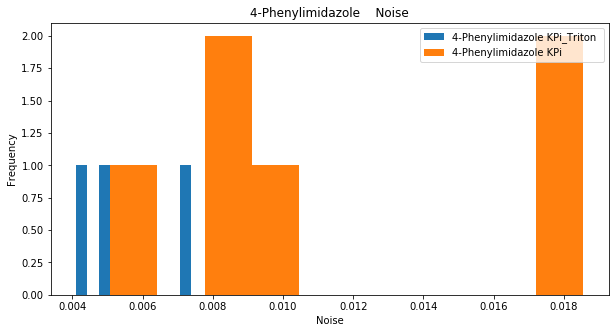

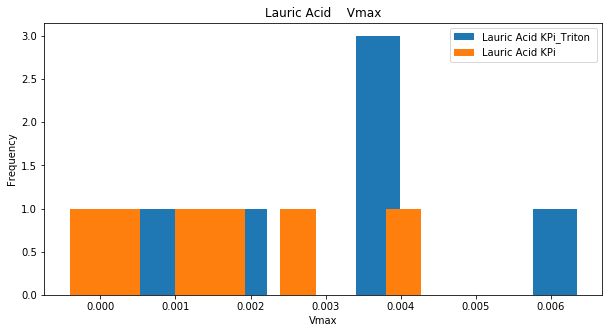

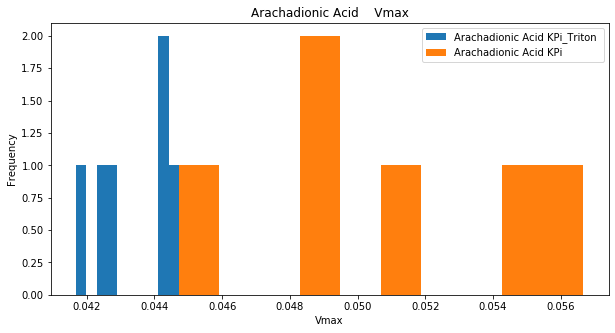

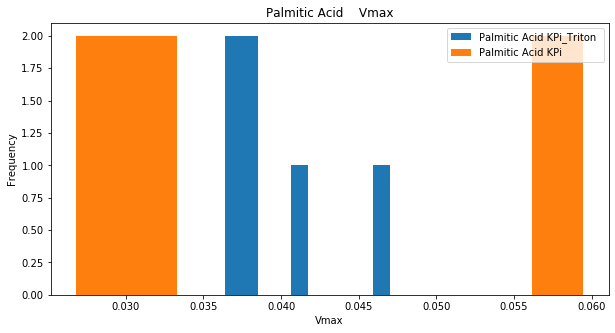

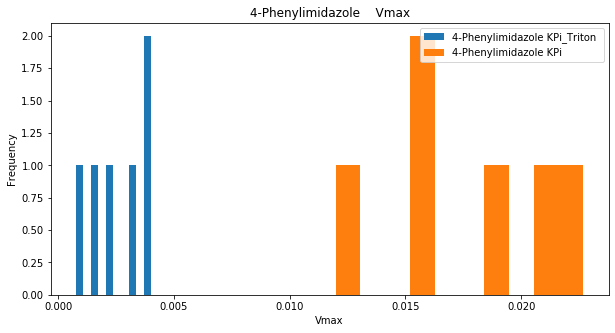

In [45]:
def PlotHistOfMetric(metrics,criteria):
    
    for i in metrics['Compound'].unique():
        plt.figure(figsize = (10,5))
        labels = []
        temp = metrics.loc[metrics['Compound'] == i]
        for j in temp['Plate'].unique():
            cpd = temp.loc[temp['Plate'] == j]
            plt.hist(cpd[criteria])
            labels.append(i + j)
        plt.title(i + '    '+criteria)
        plt.ylabel('Frequency')
        plt.xlabel(criteria)
        labels = [i.replace('20191202_', ' ') for i in labels]
        labels = [i.replace('.CSV', ' ') for i in labels]
        plt.legend(labels)
        plt.show()
            
            
PlotHistOfMetric(metrics,'Kd')
PlotHistOfMetric(metrics,'Noise')
PlotHistOfMetric(metrics,'Vmax')